# Ein Jupyter-Kernel für Logik und Mengentheorie

### David Geleßus, Michael Leuschel
### Bad Honnef, 2019
#### 36. Workshop der GI-Fachgruppe Programmiersprachen und Rechenkonzepte

![ProB](./img/prob_logo.png)

# Einführung: Notebooks, Jupyter

## Was ist ein Notebook?

* Dokument mit Text und ausführbaren Code-Abschnitten
* Code kann interaktiv ausgeführt werden
* Ergebnisse erscheinen im Notebook unter dem jeweiligem Code
* Ähnlich wie eine REPL (read-eval-print-loop), mit einigen Unterschieden:
    * Code-Abschnitte können "außer der Reihe" bearbeitet und ausgeführt werden
    * Ausgaben können formatierten Text und Grafiken enthalten
    * Speicherbar als Datei
    * Code kann später neu ausgeführt werden
    * Weitergabe an andere Nutzer möglich
* Implementierungen: Mathematica, Maple, Jupyter, u. a.

## Jupyter Notebook

* Browserbasierte Notebook-Oberfläche
* Open Source und plattformübergreifend
* Stammt aus der Python-Community, in Python implementiert
* ACM System Software Award 2017
* Jupyter-Notebooks können aber verschiedene Programmiersprachen verwenden
* Dazu trennt Jupyter strikt zwischen Frontend und Kernel:
    * Das allgemeine **Frontend** implementiert z. B. Benutzeroberfläche und Dateiformat
    * Ein sprachspezifischer **Kernel** stellt die Sprache dem Frontend zur Verfügung
* Schnittstellen zwischen Frontend und Kernel sind sprachneutral
    * Kernel können in (fast) jeder Sprache implementiert werden, kein Python-Code nötig

## ProB (https://www3.hhu.de/stups/prob)

* Werkzeug zur Animation, Verifikation und Visualisierung formeller Spezifikationen
* Grundlage: Solver für Prädikatenlogik, Mengentheorie mit Relationen, Funktionen und Arithmetik.
* Unterstützt hauptsächlich B-Spezifikationen (klassisches B, Event-B)
* Versteht auch andere Sprachen wie TLA<sup>+</sup> und CSP<sub>M</sub>
* Verschiedene Solver Backends (CLP, SAT, SMT), verschiedene Modelchecking Backends (Prolog, parB, C für LTL, LTSMin [sym,seq,par], TLC)
* ProBs APIs sind für alle Sprachen gleich
    * Der ProB 2-Jupyter-Kernel unterstützt daher (fast) alle Sprachen, die ProB versteht

## Einsatz von ProB in der Industrie
* Datenvalidierung: Siemens (Paris Line 1, Barcelona, Alger, ...), Alstom (Amsterdam,...), Thales (Schweiz, Dänemark, Slovenien, Thailand,...), RATP, SNCF, ...
* Zertifizierung als T2 Werkzeug nach EN50128
* Validierung von Systemmodellen: ClearSy (Octys, ...),...
* Ausführung formaler Modelle in Echtzeit
 * SlotTool 
 * Hybrid Level 3 - ETCS  (Thales, ProRail/Network Rail/DB), Video der Deutschen Bahn: https://www.youtube.com/watch?v=FjKnugbmrP4
![HL3](./img/HL3_screenshot.png)

* Anmerkung: in etwa 30% aller CBTC U-Bahnen weltweit benutzen B.

## Architektur von ProB

* **`probcli`:** Kern/Hauptteil von ProB
    * Implementiert in SICStus Prolog
    * Erlaubt Animation, Visualisierung, Verifikation von formellen Spezifikationen
    * Unterstützt u. A. (klassisches) B, Event-B, TLA<sup>+</sup>, CSP<sub>M</sub>
    * Kommandozeilentool oder interaktive REPL
* **ProB 2-Java-API:** (aka ProB 2-Kernel; ≠ ProB 2-Jupyter-Kernel!)
    * Objektorientierte Java-Schnittstelle für ProB
    * Verwaltet automatisch eine oder mehrere `probcli`-Instanzen
* **ProB 2-Jupyter-Kernel:** Jupyter-Kernel-Implementierung für ProB
    * In Java implementiert
    * Ansteuerung von ProB durch ProB 2-Java-API
    * Kommunikation mit Jupyter durch Jupyter-JVM-BaseKernel

## Formeln auswerten

* B-Ausdrücke auswerten und Prädikate lösen wie in `probcli -repl`

Zum Beispiel, Primzahlen bis 50 ausgeben:

In [48]:
{x | x > 1 & x < 500 & not(#y.(y > 1 & y < x & x mod y = 0))}

$\{2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,101,103,107,109,113,127,131,137,139,149,151,157,163,167,173,179,181,191,193,197,199,211,223,227,229,233,239,241,251,257,263,269,271,277,281,283,293,307,311,313,317,331,337,347,349,353,359,367,373,379,383,389,397,401,409,419,421,431,433,439,443,449,457,461,463,467,479,487,491,499\}$

In [49]:
:prettyprint x > 1 & x < 50 & not(#y.(y > 1 & y < x & x mod y = 0))

x > 1 ∧ x < 50 ∧ ¬(∃y·(y > 1 ∧ y < x ∧ x mod y = 0))

Eingabe als Unicode ist auch erlaubt:

In [50]:
{x | x>1 ∧ x<50 ∧ ¬(∃y.(y>1 ∧ y<x ∧ x mod y=0))}

$\{2,3,5,7,11,13,17,19,23,29,31,37,41,43,47\}$

Mehrzeilige Eingabe ist möglich, es gibt Syntax-Highlighting und Code Completion.

In [51]:
{S, E, N, D, M, O, R, Y} <: 0..9
& S > 0 & M > 0
& card({S, E, N, D, M, O, R, Y}) = 8
&
            S*1000 + E*100 + N*10 + D
+           M*1000 + O*100 + R*10 + E
= M*10000 + O*1000 + N*100 + E*10 + Y

$\mathit{TRUE}$

**Solution:**
* $\mathit{R} = 8$
* $\mathit{S} = 9$
* $\mathit{D} = 7$
* $\mathit{E} = 5$
* $\mathit{Y} = 2$
* $\mathit{M} = 1$
* $\mathit{N} = 6$
* $\mathit{O} = 0$

Mithilfe der Mengentheorie kann man alle Lösungen finden, und mit dem ```:table``` Kommando als Tabelle ausgeben.

In [52]:
:table {S,E,N,D,M,O,R,Y |

{S, E, N, D, M, O, R, Y} <: 0..9
& S > 0 & M > 0 // <--
& card({S, E, N, D, M, O, R, Y}) = 8
&
            S*1000 + E*100 + N*10 + D
+           M*1000 + O*100 + R*10 + E
= M*10000 + O*1000 + N*100 + E*10 + Y

}

|S|E|N|D|M|O|R|Y|
|---|---|---|---|---|---|---|---|
|$9$|$5$|$6$|$7$|$1$|$0$|$8$|$2$|


In B sind Folgen auch Funktionen, Funktionen auch Relationen, Relationen auch Mengen.
Relationen können in Jupyter auch grafisch dargestellt werden.

In [53]:
{x,y|x:1..5 & y:1..5 & x>y}

$\{(2\mapsto 1),(3\mapsto 1),(3\mapsto 2),(4\mapsto 1),(4\mapsto 2),(4\mapsto 3),(5\mapsto 1),(5\mapsto 2),(5\mapsto 3),(5\mapsto 4)\}$

In [54]:
:pref DOT_ENGINE=circo

Preference changed: DOT_ENGINE = circo


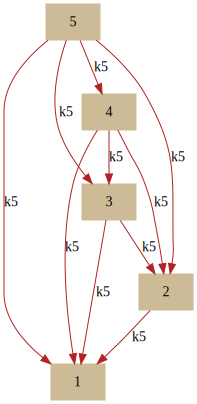

In [84]:
:dot expr_as_graph ("k5",({x,y|x:1..5 & y:1..5 & x>y} ))

# Anwendungsmöglichkeiten

## Interaktive Nutzung als REPL

* Jupyter Notebook kann wie eine REPL benutzt werden
* Vorteile: mehrzeilige Eingaben, formatierte Ausgaben, verbesserte Editor-Funktionen, speicherbar
* Alternative: `jupyter console` ermöglicht Verwendung von Jupyter-Kerneln im Terminal
    * Verhält sich wie eine klassische REPL, arbeitet nicht mit Notebooks
    * Unterstützt trotzdem erweiterte Funktionen: Eingabeverlauf, Code-Vervollständigung

## Interaktive Experimentierung

* Beliebige Stellen im Notebook können bearbeitet und neu ausgeführt werden
* Vereinfacht Testen von Änderungen am Code, z. B.:
    * Andere Konstanten-/Präferenzwerte
    * Hinzufügen/Entfernen von Invarianten/Guards
    * Ändern der Operationsfolge
* Auch Notebooks von anderen Nutzern können ohne Weiteres bearbeitet werden
    * Notebook-Dateien sind nie "schreibgeschützt"
    * Anzeige und Bearbeitung nutzen die gleiche Oberfläche
* Anwendungen:
    * ProB-Notebook als Dokumentation und Beispielcode zu einem B-Modell
    * ProB-Notebook
    * Übungsblätter für Lehrveranstaltungen (B, Logik, Mengentheorie, theoretische Informatik) als Notebooks

# Anwendung als Dokumentation (Bibliothek von ProB)

## LibraryRegex

This library provides various facilities for pattern matching with regular expressions.
You can obtain the definitions below by putting the following into your DEFINITIONS clause:

`DEFINITIONS "LibraryRegex.def"`

The file `LibraryRegex.def` is also bundled with ProB and can be found in the `stdlib` folder (as of version 1.8.3-beta4).

In [58]:
::load
MACHINE Jupyter_LibraryRegex
DEFINITIONS "LibraryRegex.def"; "LibraryStrings.def"
END

Loaded machine: Jupyter_LibraryRegex

### REGEX_SEARCH_ALL
This external function searches for **all** occurences of a pattern in a string and returns the matched strings as a B sequence.
It always starts to match at the beginning.

Type: $STRING \times STRING \rightarrow seq(STRING)$.

In [59]:
REGEX_SEARCH_ALL("abcdef000234daf567","([1-9])([0-9]*)")

$\{(1\mapsto\text{"234"}),(2\mapsto\text{"567"})\}$

In [60]:
REGEX_SEARCH_ALL("abc-äéà-123","[[:alpha:]]")

$[\text{"a"},\text{"b"},\text{"c"},\text{"ä"},\text{"é"},\text{"à"}]$

# Anwendung: Interaktive Skripte für Vorlesungen



In [ ]:
::load
MACHINE BaseTypes
SETS PERSONS = {peter,paul,mary}; COLOURS = {red,green,blue}
END

In mathematics a binary relation over the sets $A$ and $B$ is defined to be
 a subset of $A\times B$.
The Cartesian product $A \times B$ in turn is defined to be the set of pairs
 $a \mapsto b$ such that $a\in A$ and $b\in B$.
 For example, we have:

In [ ]:
PERSONS × COLOURS

A particular relation could be the following one, which is a subset of PERSONS × COLOURS:

In [ ]:
{peter|->green,peter|->blue,mary|->blue}

We can visualize this relation graphically as follows:

In [ ]:
:dot expr_as_graph ("r1",{peter|->green,peter|->blue,mary|->blue})

In [ ]:
:table {peter|->green,peter|->blue,mary|->blue}

As in B a relation is a set of pairs, all set operators can be applied to relations.
For example,

In [ ]:
{peter|->green,peter|->blue,mary|->blue} - {mary|->blue}

In [ ]:
{peter|->green,peter|->blue,mary|->blue} /\ {mary}*COLOURS

# Anwendung: Skript für theoretische Informatik (NFA)

Es folgen Teile aus dem Skript von Informatik 4 (Hauptautor Jörg Rothe).

Nun erweitern wir die Überführungsfunktion in der Definition eines DFA 
und bezeichnen die neuen Automaten als NFA.

#### DEFINITION 2.9 (NFA)
Ein nichtdeterministischer endlicher Automat 
(kurz NFA) ist ein  Quintupel $M = (\Sigma, Z, \delta , S, F)$, wobei

* $\Sigma$ ein Alphabet ist,
* $Z$ eine endliche Menge von Zust"anden mit $\Sigma \cap Z = \emptyset$,
* $\delta : Z \times \Sigma \rightarrow \pow(Z)$ die
  Überführungsfunktion (hier: $\pow(Z)$ ist die Potenzmenge
  von $Z$, also die Menge aller Teilmengen von $Z$),
* $S \subseteq Z$ die Menge der Startzustände und
* $F \subseteq Z$ die Menge der Endzustände (Finalzustände).


#### DEFINITION 2.10 (Sprache eines NFA)

Die erweiterte Überführungsfunktion $\widehat{\delta} :
\pow(Z) \times \Sigma^* \rightarrow \pow(Z)$ von $M$ ist
induktiv definiert:
* $\widehat{\delta}(Z', \lambda) = Z'$
* $\widehat{\delta}(Z', ax) = \bigcup_{z \in Z'} \widehat{\delta}(\delta(z,a), x)$
für alle $Z' \subseteq Z$, $a \in \Sigma$ und $x \in \Sigma^*$.

Die vom NFA $M$ akzeptierte Sprache ist definiert durch
* L(M) = $\{w \in \Sigma^* \mid \widehat{\delta}(S,w) \cap F \neq \emptyset\}$


Wie laden nun ein B Modell welches diese Definitionen beinhaltet.
Wörter werden dabei in der B Sprache mit eckigen Klammern und Kommas geschrieben; aus 101 wird [1,0,1].
Gewisse griechische Zeichen sind in der B Sprache als Schlüsselwörter reserviert, zB $\lambda$.
Auch kann man leider weder ' noch $\hat$ in Bezeichnern verwenden.
Deshalb wird aus
* $\Sigma^*$ wird ```seq(Σ)```
* $\widehat{\delta}$ wird ```δs```

In [3]:
::load
MACHINE NFA_nach_DFA
SETS
   Z = {z0,z1,z2,z3}
ABSTRACT_CONSTANTS δs, L
CONSTANTS Σ, S, F, δ
PROPERTIES
 S ⊆ Z ∧ F ⊆ Z ∧ δ ∈ (Z×Σ) → ℙ(Z) ∧

 /* Definition der erweiterten Übergangsfunktion */
 δs = λ(Z2,s).(Z2⊆Z | IF s=[] THEN Z2 ELSE UNION(z).(z∈Z2|δs(δ(z,first(s)),tail(s))) END )
 ∧
 /* die vom Automaten generierte Sprache */
 L = {ω|ω∈seq(Σ) ∧ δs(S,ω) ∩ F ≠ ∅}
 ∧
 /* Nun ein Beispiel-Automat von Folie 24 (Info 4) */
 Σ = {0,1} ∧
 S = {z0} ∧ F={z2} ∧
 δ = {     (z0,0)↦{z0}, (z0,1)↦{z0,z1},
           (z1,0)↦{z2}, (z1,1)↦{z2},
           (z2,0)↦{z3}, (z2,1)↦{z3},
           (z3,0)↦{z3}, (z3,1)↦{z3} }
END

Loaded machine: NFA_nach_DFA

In [62]:
:constants

Machine constants set up using operation 0: $setup_constants()

In [63]:
:init

Machine initialised using operation 1: $initialise_machine()

Die Übergangsfunktion $\delta$ gibt us für einen Zustand und ein Symbol die möglichen nächsten Zustande an:

In [64]:
δ(z0,1)

$\{\mathit{z0},\mathit{z1}\}$

Der obige Automat ist nichtdeterministisch, da zum Beispiel:

In [65]:
card(δ(z0,1))

$2$

Wir können die Übergangsfunktion $\delta$ des Automaten auch als Tabelle oder Graphen darstellen:

In [66]:
:table δ

|prj11|prj12|prj2|
|---|---|---|
|$\mathit{z0}$|$0$|$\{\mathit{z0}\}$|
|$\mathit{z0}$|$1$|$\{\mathit{z0},\mathit{z1}\}$|
|$\mathit{z1}$|$0$|$\{\mathit{z2}\}$|
|$\mathit{z1}$|$1$|$\{\mathit{z2}\}$|
|$\mathit{z2}$|$0$|$\{\mathit{z3}\}$|
|$\mathit{z2}$|$1$|$\{\mathit{z3}\}$|
|$\mathit{z3}$|$0$|$\{\mathit{z3}\}$|
|$\mathit{z3}$|$1$|$\{\mathit{z3}\}$|


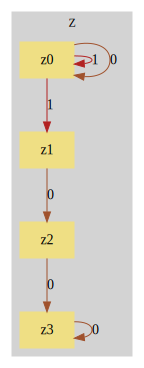

In [67]:
:dot expr_as_graph ("0",{x,y| x∈Z & y:δ(x,0)},
                    "1",{x,y| x∈S & y∈δ(x,1)})

Die Funktion $\widehat{\delta}$ berechnet die möglichen Zustände nach dem Abarbeiten eines Wortes. Zum Beispiel, kann sich der Automat nach dem Abarbeiten des Präfixes 111 in folgenden Zuständen befinden:

In [68]:
δs(S,[1,1,1])

$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$

Der Automat akzeptiert zum Beispiel das Wort 111 und das Wort 101 nicht, da:

In [69]:
δs(S,[1,1,1]) ∩ F

$\{\mathit{z2}\}$

In [70]:
δs(S,[1,0,1]) ∩ F

$\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$

Folgende Wörter der Länge 3 werden vom Automaten akzeptiert:

In [71]:
:table {x,y,z| [x,y,z]∈L}

|x|y|z|
|---|---|---|
|$0$|$1$|$0$|
|$0$|$1$|$1$|
|$1$|$1$|$0$|
|$1$|$1$|$1$|


und folgende werden nicht akzeptiert:

In [72]:
:table {x,y,z| {x,y,z} ⊆ Σ & ¬([x,y,z]∈L)}

|x|y|z|
|---|---|---|
|$0$|$0$|$0$|
|$0$|$0$|$1$|
|$1$|$0$|$0$|
|$1$|$0$|$1$|


Es stellt sich die Frage, ob NFAs mächtiger sind als DFAs. Die 
Antwort lautet: Nein.

## Theorem (Rabin und Scott)
Jede von einem NFA akzeptierte Sprache kann auch von einem DFA akzeptiert
werden.

### Beweis
Sei $M = (\Sigma, Z, \delta , S, E)$ ein NFA. 
Konstruiere einen zu
  $M$ äquivalenten DFA 
  $M' = (\Sigma, \pow(Z), \delta' ,z_0', F)$ wie folgt:
* Zustandsmenge von $M'$: die Potenzmenge $\pow(Z)$ von $Z$,
* $\delta'(Z' , a) = \widehat{\delta}(Z',a)$ für alle $Z' \subseteq Z$ und $a \in \Sigma$,
* $z_0'=S$,
* $F = \{ Z' \subseteq Z \mid Z' \cap E \neq \emptyset\}$.
Offenbar sind M' und M äquivalent, denn für alle ...


Für den oben geladen Automaten können wir diese Konstruktion illustrieren.
Die Potenzmenge der Zustände ist:

In [73]:
ℙ(Z)

$\renewcommand{\emptyset}{\mathord\varnothing}\{\emptyset,\{\mathit{z0}\},\{\mathit{z0},\mathit{z1}\},\{\mathit{z0},\mathit{z2}\},\{\mathit{z0},\mathit{z3}\},\{\mathit{z1}\},\{\mathit{z0},\mathit{z1},\mathit{z2}\},\{\mathit{z0},\mathit{z1},\mathit{z3}\},\{\mathit{z1},\mathit{z2}\},\{\mathit{z1},\mathit{z3}\},\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\},\{\mathit{z2}\},\{\mathit{z0},\mathit{z2},\mathit{z3}\},\{\mathit{z1},\mathit{z2},\mathit{z3}\},\{\mathit{z2},\mathit{z3}\},\{\mathit{z3}\}\}$

Tabellarisch k¨ønnen wir $\widehat{\delta}$ für $\pow(Z)$ wie folgt ausrechnen:

In [74]:
:table {x,a,y| a∈Σ & x∈ℙ(Z) & y=δs(x,[a])}

|x|a|y|
|---|---|---|
|$\renewcommand{\emptyset}{\mathord\varnothing}\renewcommand{\emptyset}{\mathord\varnothing}\renewcommand{\emptyset}{\mathord\varnothing}\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$|$0$|$\emptyset$|
|$\emptyset$|$1$|$\emptyset$|
|$\{\mathit{z0}\}$|$0$|$\{\mathit{z0}\}$|
|$\{\mathit{z0}\}$|$1$|$\{\mathit{z0},\mathit{z1}\}$|
|$\{\mathit{z0},\mathit{z1}\}$|$0$|$\{\mathit{z0},\mathit{z2}\}$|
|$\{\mathit{z0},\mathit{z1}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z2}\}$|
|$\{\mathit{z0},\mathit{z2}\}$|$0$|$\{\mathit{z0},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z2}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z3}\}$|$0$|$\{\mathit{z0},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z3}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z3}\}$|
|$\{\mathit{z1}\}$|$0$|$\{\mathit{z2}\}$|
|$\{\mathit{z1}\}$|$1$|$\{\mathit{z2}\}$|
|$\{\mathit{z0},\mathit{z1},\mathit{z2}\}$|$0$|$\{\mathit{z0},\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z1},\mathit{z2}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z1},\mathit{z3}\}$|$0$|$\{\mathit{z0},\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z1},\mathit{z3}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z1},\mathit{z2}\}$|$0$|$\{\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z1},\mathit{z2}\}$|$1$|$\{\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z1},\mathit{z3}\}$|$0$|$\{\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z1},\mathit{z3}\}$|$1$|$\{\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$|$0$|$\{\mathit{z0},\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z2}\}$|$0$|$\{\mathit{z3}\}$|
|$\{\mathit{z2}\}$|$1$|$\{\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z2},\mathit{z3}\}$|$0$|$\{\mathit{z0},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z2},\mathit{z3}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z3}\}$|
|$\{\mathit{z1},\mathit{z2},\mathit{z3}\}$|$0$|$\{\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z1},\mathit{z2},\mathit{z3}\}$|$1$|$\{\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z2},\mathit{z3}\}$|$0$|$\{\mathit{z3}\}$|
|$\{\mathit{z2},\mathit{z3}\}$|$1$|$\{\mathit{z3}\}$|
|$\{\mathit{z3}\}$|$0$|$\{\mathit{z3}\}$|
|$\{\mathit{z3}\}$|$1$|$\{\mathit{z3}\}$|


Graphisch lässt sich der Automat wie folgt darstellen; die Start und Endzustände sind noch nicht schön markiert.

In [75]:
:pref DOT_DECOMPOSE_NODES=FALSE

Preference changed: DOT_DECOMPOSE_NODES = FALSE


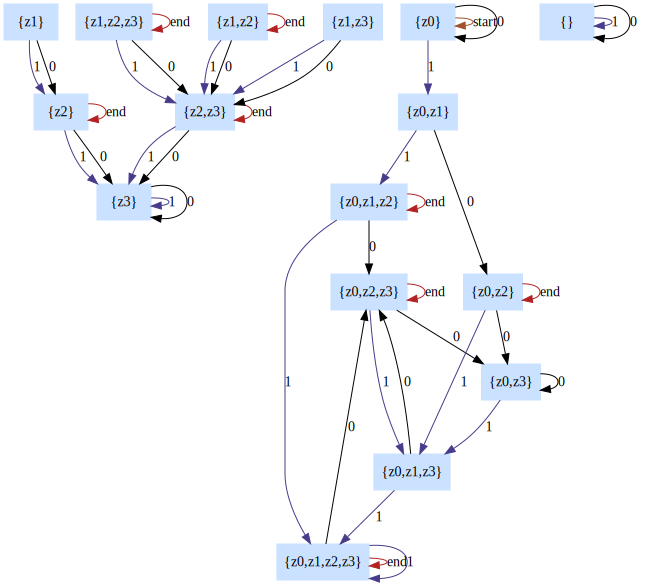

In [76]:
:dot expr_as_graph ("0",{x,y| x∈ℙ(Z) & δs(x,[0]) = y},
                    "1",{x,y| x∈ℙ(Z) & δs(x,[1]) = y},
                    "start", {x,y|x=y & x={z0}},
                    "end", {x,y|x=y & x∩F ≠ ∅})

# Anwendung: Prüfbericht
ProB wird zur Datenvalidierung benutzt.
Man kann mit Jupyter auch Prüfberichte erstellen, inklusive der Darstellung von Gegenbeispielen und Erklärungen.
Als Beispiel werden hier keine Daten aus der Bahntechnik sondern Daten über chemische Elemente benutzt.


## Validation Report: Chemical Elements

This report was generated with the following version of ProB:

In [ ]:
:version

We read in a CSV data file containing the chemical elements:

In [77]:
::load
MACHINE ChemicalElements
DEFINITIONS
 "LibraryStrings.def";
 "LibraryCSV.def"
CONSTANTS eltable
PROPERTIES
 eltable : POW(STRING*STRING*INTEGER*STRING) &
 eltable = READ_CSV("csv/elementdata.csv",TRUE,TRUE)  // we skip line 1 and extra columns
END

Loaded machine: ChemicalElements

In [78]:
:constants

Machine constants set up using operation 0: $setup_constants()

We have read in the following number of elements:

In [79]:
card(eltable)

$118$

In [80]:
:table eltable

|prj111|prj112|prj12|prj2|
|---|---|---|---|
|$\text{"Actinium"}$|$\text{"Ac"}$|$89$|$\text{"227.0278"}$|
|$\text{"Aluminum"}$|$\text{"Al"}$|$13$|$\text{"26.981539"}$|
|$\text{"Americium"}$|$\text{"Am"}$|$95$|$\text{"243.0614"}$|
|$\text{"Antimony"}$|$\text{"Sb"}$|$51$|$\text{"121.76"}$|
|$\text{"Argon"}$|$\text{"Ar"}$|$18$|$\text{"39.948"}$|
|$\text{"Arsenic"}$|$\text{"As"}$|$33$|$\text{"74.92159"}$|
|$\text{"Astatine"}$|$\text{"At"}$|$85$|$\text{"209.9871"}$|
|$\text{"Barium"}$|$\text{"Ba"}$|$56$|$\text{"137.327"}$|
|$\text{"Berkelium"}$|$\text{"Bk"}$|$97$|$\text{"247.0703"}$|
|$\text{"Beryllium"}$|$\text{"Be"}$|$4$|$\text{"9.01218"}$|
|$\text{"Bismuth"}$|$\text{"Bi"}$|$83$|$\text{"208.98037"}$|
|$\text{"Bohrium"}$|$\text{"Bh"}$|$107$|$\text{"[264]"}$|
|$\text{"Boron"}$|$\text{"B"}$|$5$|$\text{"10.811"}$|
|$\text{"Bromine"}$|$\text{"Br"}$|$35$|$\text{"79.904"}$|
|$\text{"Cadmium"}$|$\text{"Cd"}$|$48$|$\text{"112.411"}$|
|$\text{"Calcium"}$|$\text{"Ca"}$|$20$|$\text{"40.078"}$|
|$\text{"Californium"}$|$\text{"Cf"}$|$98$|$\text{"251.0796"}$|
|$\text{"Carbon"}$|$\text{"C"}$|$6$|$\text{"12.011"}$|
|$\text{"Cerium"}$|$\text{"Ce"}$|$58$|$\text{"140.115"}$|
|$\text{"Cesium"}$|$\text{"Cs"}$|$55$|$\text{"132.90543"}$|
|$\text{"Chlorine"}$|$\text{"Cl"}$|$17$|$\text{"35.4527"}$|
|$\text{"Chromium"}$|$\text{"Cr"}$|$24$|$\text{"51.9961"}$|
|$\text{"Cobalt"}$|$\text{"Co"}$|$27$|$\text{"58.9332"}$|
|$\text{"Copper"}$|$\text{"Cu"}$|$29$|$\text{"63.546"}$|
|$\text{"Curium"}$|$\text{"Cm"}$|$96$|$\text{"247.0703"}$|
|$\text{"Dubnium"}$|$\text{"Db"}$|$105$|$\text{"[262]"}$|
|$\text{"Dysprosium"}$|$\text{"Dy"}$|$66$|$\text{"162.5"}$|
|$\text{"Einsteinium"}$|$\text{"Es"}$|$99$|$\text{"252.083"}$|
|$\text{"Erbium"}$|$\text{"Er"}$|$68$|$\text{"167.26"}$|
|$\text{"Europium"}$|$\text{"Eu"}$|$63$|$\text{"151.965"}$|
|$\text{"Fermium"}$|$\text{"Fm"}$|$100$|$\text{"257.0951"}$|
|$\text{"Fluorine"}$|$\text{"F"}$|$9$|$\text{"18.998403"}$|
|$\text{"Francium"}$|$\text{"Fr"}$|$87$|$\text{"223.0197"}$|
|$\text{"Gadolinium"}$|$\text{"Gd"}$|$64$|$\text{"157.25"}$|
|$\text{"Gallium"}$|$\text{"Ga"}$|$31$|$\text{"69.723"}$|
|$\text{"Germanium"}$|$\text{"Ge"}$|$32$|$\text{"72.61"}$|
|$\text{"Gold"}$|$\text{"Au"}$|$79$|$\text{"196.96654"}$|
|$\text{"Hafnium"}$|$\text{"Hf"}$|$72$|$\text{"178.49"}$|
|$\text{"Hassium"}$|$\text{"Hs"}$|$108$|$\text{"[269]"}$|
|$\text{"Helium"}$|$\text{"He"}$|$2$|$\text{"4.002602"}$|
|$\text{"Holmium"}$|$\text{"Ho"}$|$67$|$\text{"164.93032"}$|
|$\text{"Hydrogen"}$|$\text{"H"}$|$1$|$\text{"1.00794"}$|
|$\text{"Indium"}$|$\text{"In"}$|$49$|$\text{"114.818"}$|
|$\text{"Iodine"}$|$\text{"I"}$|$53$|$\text{"126.90447"}$|
|$\text{"Iridium"}$|$\text{"Ir"}$|$77$|$\text{"192.22"}$|
|$\text{"Iron"}$|$\text{"Fe"}$|$26$|$\text{"55.847"}$|
|$\text{"Krypton"}$|$\text{"Kr"}$|$36$|$\text{"83.8"}$|
|$\text{"Lanthanum"}$|$\text{"La"}$|$57$|$\text{"138.9055"}$|
|$\text{"Lawrencium"}$|$\text{"Lr"}$|$103$|$\text{"262.11"}$|
|$\text{"Lead"}$|$\text{"Pb"}$|$82$|$\text{"207.2"}$|
|$\text{"Lithium"}$|$\text{"Li"}$|$3$|$\text{"6.941"}$|
|$\text{"Lutetium"}$|$\text{"Lu"}$|$71$|$\text{"174.967"}$|
|$\text{"Magnesium"}$|$\text{"Mg"}$|$12$|$\text{"24.305"}$|
|$\text{"Manganese"}$|$\text{"Mn"}$|$25$|$\text{"54.93805"}$|
|$\text{"Meitnerium"}$|$\text{"Mt"}$|$109$|$\text{"[268]"}$|
|$\text{"Mendelevium"}$|$\text{"Md"}$|$101$|$\text{"258.1"}$|
|$\text{"Mercury"}$|$\text{"Hg"}$|$80$|$\text{"200.59"}$|
|$\text{"Molybdenum"}$|$\text{"Mo"}$|$42$|$\text{"95.94"}$|
|$\text{"Neodymium"}$|$\text{"Nd"}$|$60$|$\text{"144.24"}$|
|$\text{"Neon"}$|$\text{"Ne"}$|$10$|$\text{"20.1797"}$|
|$\text{"Neptunium"}$|$\text{"Np"}$|$93$|$\text{"237.048"}$|
|$\text{"Nickel"}$|$\text{"Ni"}$|$28$|$\text{"58.6934"}$|
|$\text{"Niobium"}$|$\text{"Nb"}$|$41$|$\text{"92.90638"}$|
|$\text{"Nitrogen"}$|$\text{"N"}$|$7$|$\text{"14.00674"}$|
|$\text{"Nobelium"}$|$\text{"No"}$|$102$|$\text{"259.1009"}$|
|$\text{"Osmium"}$|$\text{"Os"}$|$76$|$\text{"190.23"}$|
|$\text{"Oxygen"}$|$\text{"O"}$|$8$|$\text{"15.9994"}$|
|$\text{"Palladium"}$|$\text{"Pd"}$|$46$|$\text{"106.42"}$|
|$\text{"Phosphorus"}$|$\text{"P"}$|$15$|$\text{"30.973762"}$|
|$\text{"Platinum"}$|$\text{"Pt"}$|$78$|$\text{"195.08"}$|
|$\text{"Plutonium"}$|$\text{"Pu"}$|$94$|$\text{"244.0642"}$|
|$\text{"Polonium"}$|$\text{"Po"}$|$84$|$\text{"208.9824"}$|
|$\text{"Potassium"}$|$\text{"K"}$|$19$|$\text{"39.0983"}$|
|$\text{"Praseodymium"}$|$\text{"Pr"}$|$59$|$\text{"140.90765"}$|
|$\text{"Promethium"}$|$\text{"Pm"}$|$61$|$\text{"144.9127"}$|
|$\text{"Protactinium"}$|$\text{"Pa"}$|$91$|$\text{"231.03588"}$|
|$\text{"Radium"}$|$\text{"Ra"}$|$88$|$\text{"226.0254"}$|
|$\text{"Radon"}$|$\text{"Rn"}$|$86$|$\text{"222.0176"}$|
|$\text{"Rhenium"}$|$\text{"Re"}$|$75$|$\text{"186.207"}$|
|$\text{"Rhodium"}$|$\text{"Rh"}$|$45$|$\text{"102.9055"}$|
|$\text{"Rubidium"}$|$\text{"Rb"}$|$37$|$\text{"85.4678"}$|
|$\text{"Ruthenium"}$|$\text{"Ru"}$|$44$|$\text{"101.07"}$|
|$\text{"Rutherfordium"}$|$\text{"Rf"}$|$104$|$\text{"[261]"}$|
|$\text{"Samarium"}$|$\text{"Sm"}$|$62$|$\text{"150.36"}$|
|$\text{"Scandium"}$|$\text{"Sc"}$|$21$|$\text{"44.95591"}$|
|$\text{"Seaborgium"}$|$\text{"Sg"}$|$106$|$\text{"[266]"}$|
|$\text{"Selenium"}$|$\text{"Se"}$|$34$|$\text{"78.96"}$|
|$\text{"Silicon"}$|$\text{"Si"}$|$14$|$\text{"28.0855"}$|
|$\text{"Silver"}$|$\text{"Ag"}$|$47$|$\text{"107.8682"}$|
|$\text{"Sodium"}$|$\text{"Na"}$|$11$|$\text{"22.989768"}$|
|$\text{"Strontium"}$|$\text{"Sr"}$|$38$|$\text{"87.62"}$|
|$\text{"Sulfur"}$|$\text{"S"}$|$16$|$\text{"32.066"}$|
|$\text{"Tantalum"}$|$\text{"Ta"}$|$73$|$\text{"180.9479"}$|
|$\text{"Technetium"}$|$\text{"Tc"}$|$43$|$\text{"97.9072"}$|
|$\text{"Tellurium"}$|$\text{"Te"}$|$52$|$\text{"127.6"}$|
|$\text{"Terbium"}$|$\text{"Tb"}$|$65$|$\text{"158.92534"}$|
|$\text{"Thallium"}$|$\text{"Tl"}$|$81$|$\text{"204.3833"}$|
|$\text{"Thorium"}$|$\text{"Th"}$|$90$|$\text{"232.0381"}$|
|$\text{"Thulium"}$|$\text{"Tm"}$|$69$|$\text{"168.93421"}$|
|$\text{"Tin"}$|$\text{"Sn"}$|$50$|$\text{"118.71"}$|
|$\text{"Titanium"}$|$\text{"Ti"}$|$22$|$\text{"47.88"}$|
|$\text{"Tungsten"}$|$\text{"W"}$|$74$|$\text{"183.84"}$|
|$\text{"Ununbium"}$|$\text{"Uub"}$|$112$|$\text{"[277]"}$|
|$\text{"Ununhexium"}$|$\text{"Uuh"}$|$116$|$\text{"-"}$|
|$\text{"Ununnilium"}$|$\text{"Uun"}$|$110$|$\text{"[269]"}$|
|$\text{"Ununoctium"}$|$\text{"Uuo"}$|$118$|$\text{"-"}$|
|$\text{"Ununpentium"}$|$\text{"Uup"}$|$115$|$\text{"-"}$|
|$\text{"Ununquadium"}$|$\text{"Uuq"}$|$114$|$\text{"[289]"}$|
|$\text{"Ununseptium"}$|$\text{"Uus"}$|$117$|$\text{"-"}$|
|$\text{"Ununtrium"}$|$\text{"Uut"}$|$113$|$\text{"-"}$|
|$\text{"Unununium"}$|$\text{"Uuu"}$|$111$|$\text{"[272]"}$|
|$\text{"Uranium"}$|$\text{"U"}$|$92$|$\text{"238.0289"}$|
|$\text{"Vanadium"}$|$\text{"V"}$|$23$|$\text{"50.9415"}$|
|$\text{"Xenon"}$|$\text{"Xe"}$|$54$|$\text{"131.29"}$|
|$\text{"Ytterbium"}$|$\text{"Yb"}$|$70$|$\text{"173.04"}$|
|$\text{"Yttrium"}$|$\text{"Y"}$|$39$|$\text{"88.90585"}$|
|$\text{"Zinc"}$|$\text{"Zn"}$|$30$|$\text{"65.39"}$|
|$\text{"Zirconium"}$|$\text{"Zr"}$|$40$|$\text{"91.224"}$|


We now check the following property, that the atomic weights are not decreasing with increasing atomic number:

In [81]:
:assert !(n1,n2,s1,s2,nr,aw1,aw2).(
   (n1,s1,nr,aw1):eltable & (n2,s2,nr+1,aw2):eltable
    =>
    DEC_STRING_TO_INT(aw1,3) <= DEC_STRING_TO_INT(aw2,3)
   )

CommandExecutionException: :assert: Assertion is not true: FALSE

In case the property is false, we can extract a table with the counter examples to the rule:

In [82]:
:table {n1,aw1,n2,aw2|#(s1,s2,nr).(
              (n1,s1,nr,aw1):eltable & STRING_IS_NUMBER(aw1) &
              (n2,s2,nr+1,aw2):eltable & STRING_IS_NUMBER(aw2) &
              DEC_STRING_TO_INT(aw1,3) > DEC_STRING_TO_INT(aw2,3))}

|n1|aw1|n2|aw2|
|---|---|---|---|
|$\text{"Argon"}$|$\text{"39.948"}$|$\text{"Potassium"}$|$\text{"39.0983"}$|
|$\text{"Cobalt"}$|$\text{"58.9332"}$|$\text{"Nickel"}$|$\text{"58.6934"}$|
|$\text{"Plutonium"}$|$\text{"244.0642"}$|$\text{"Americium"}$|$\text{"243.0614"}$|
|$\text{"Tellurium"}$|$\text{"127.6"}$|$\text{"Iodine"}$|$\text{"126.90447"}$|
|$\text{"Thorium"}$|$\text{"232.0381"}$|$\text{"Protactinium"}$|$\text{"231.03588"}$|
|$\text{"Uranium"}$|$\text{"238.0289"}$|$\text{"Neptunium"}$|$\text{"237.048"}$|


# Anwendung: Modelldokumentation, Beschreibung von Szenarien, Tests

Die ProB-Jupyter Kernel kann auch zur Erstellung von Dokumentation von B Modellen
benutzt werden:
- Beschreibung der Datenstrukturen und wie das Modell benutzt werden kann
- Beschreibung von gewünschten oder unerwünschten Szenarien

### Beispiel: problematisches Szenario im AMASS Projekt: 

![AMASS](./img/AMASS_screenshot.png)

# Future Work

* Mehr Kommandos:
    * Temporäre ("lokale") Variablen mit `:let`
    * Verifikation (LTL, Model Checking)
    * Diagramme: Plotten von Werten im Verlauf des Traces
* `In`/`Out`-Arrays um vorherige Eingaben/Ergebnisse abzurufen
* Integration mit ProB 2-Trace-Dateien
    * Konvertierung zwischen `.prob2trace` und `.ipynb`

# Zusammenfassung
* die B Sprache ist relativ nahe an der Mathematik die man in der Lehre der Informatik verwendet
* die B Sprache erlaubt funktionale Programmierung, Constraint-Programmierung, logisches Schließen und Beweisen
* mit ProB kann man B (und TLA+ und Z) animieren, auswerten, grafisch darstellen
* mit dem neuen Jupyter Kernel kann man interaktive, ausführbare Dokumente erstellen.
* die Anwendungen sind hoffentlich vielfältig